# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe(include='all')

,TV,radio,newpaper,sales
count,200.000000,200.000000,200,200.000000
unique,NaN,NaN,172,NaN
top,NaN,NaN,9.3,NaN
freq,NaN,NaN,3,NaN
mean,147.042500,23.264000,NaN,14022.500000
std,85.854236,14.846809,NaN,5217.456566
min,0.700000,0.000000,NaN,1600.000000
25%,74.375000,9.975000,NaN,10375.000000
50%,149.750000,22.900000,NaN,12900.000000
75%,218.825000,36.525000,NaN,17400.000000


In [6]:
df.at[0, 'newpaper'] = 69.2
df


,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [7]:
df.rename(columns={'newpaper': 'newspaper'}, inplace=True)

In [8]:
df['newspaper'] = df['newspaper'].astype(float)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [10]:
df.describe(include='all')


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


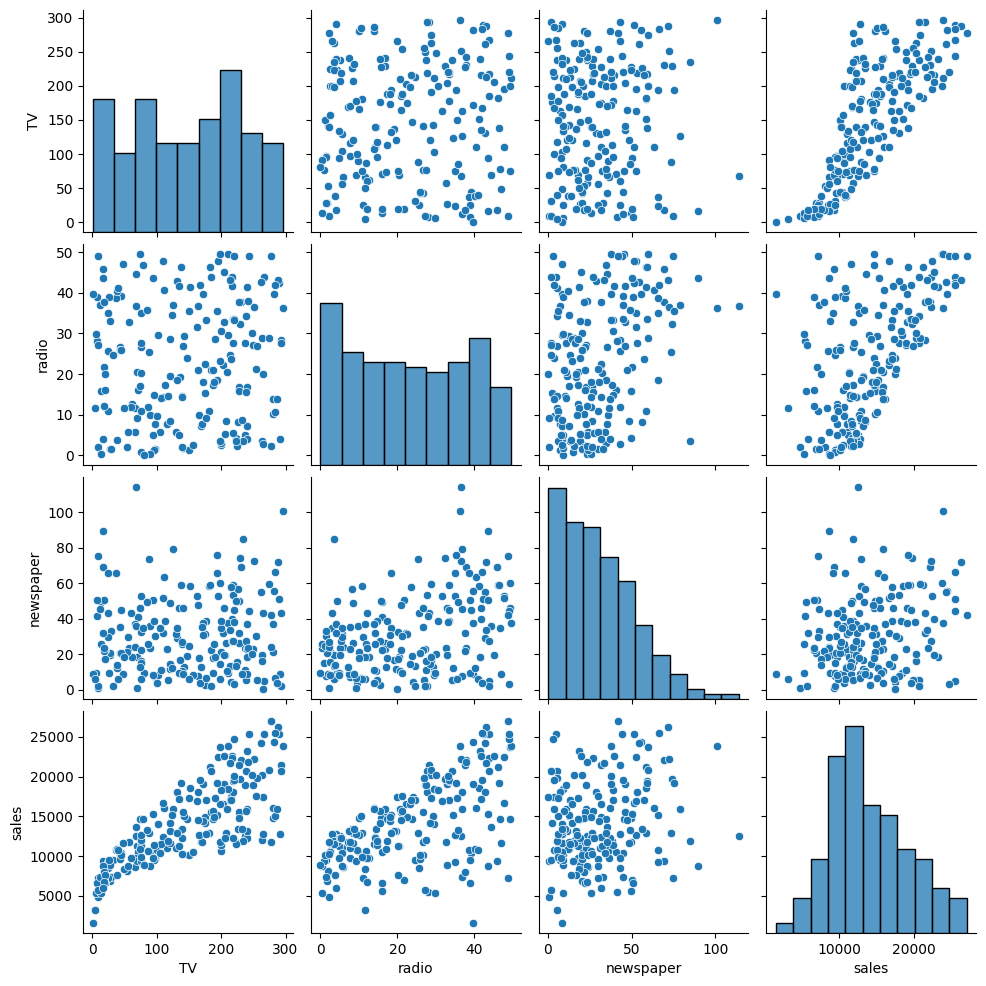

In [11]:
import seaborn as sns

sns.pairplot(df);

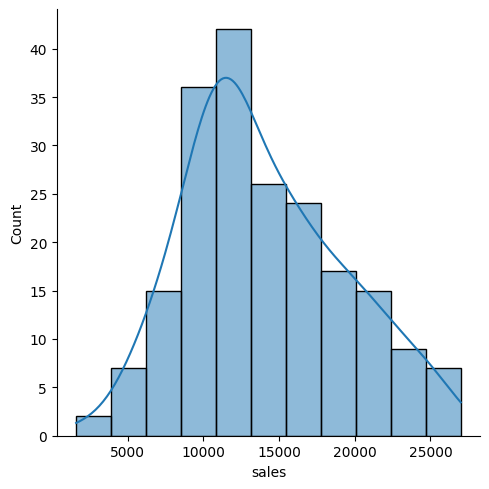

In [12]:
sns.displot(df['sales'], kde=True);

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

correlation_matrix = df.corr().round(2)
correlation_matrix


,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


<Figure size 1200x1000 with 0 Axes>

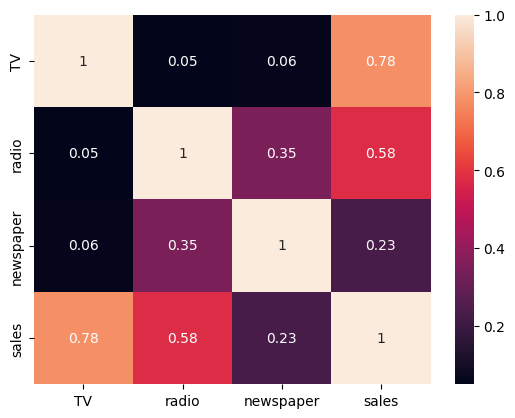

In [14]:
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print('Train shape')
print(X_train.shape)
print(y_train.shape)

print('Test shape')
print(X_test.shape)
print(y_test.shape)

Train shape
(160, 3)
(160,)
Test shape
(40, 3)
(40,)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

X_train_df = pd.DataFrame(X_train_scaled)
X_test_df = pd.DataFrame(X_test_scaled)

In [32]:
X_train_df.describe()


,0,1,2
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,-5.551115e-18,8.326673e-18,5.551115e-18
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.774345e+00,-1.549957e+00,-1.462335e+00
25%,-8.587688e-01,-8.842559e-01,-8.420458e-01
50%,7.493646e-03,-1.135334e-01,-2.143574e-01
75%,8.176095e-01,9.180491e-01,7.179263e-01
max,1.739424e+00,1.810732e+00,3.499979e+00


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [43]:
coeff_df = pd.DataFrame(lr.coef_,
                        X.columns,
                        columns=['Coefficient'])
print(coeff_df)
term_indep = lr.intercept_
print(f'Term independent: {term_indep}')


           Coefficient
TV         3764.196175
radio      2792.306650
newspaper    55.975514
Term independent: 14100.0


In [22]:
predictions = lr.predict(X_test)
predictions

array([16408.02420323, 20889.88208715, 21553.84317909, 10608.50256198,
       22112.37325986, 13105.59172402, 21057.19191631,  7461.01034456,
       13606.34580543, 15155.06966892,  9048.3199241 ,  6653.28312494,
       14345.54486508,  8903.49332887,  9689.59028038, 12164.94385914,
        8736.28397336, 16265.07257725, 10277.59582057, 18831.0910344 ,
       19560.36653309, 13251.0346424 , 12336.20694824, 21306.95131746,
        7827.40305075,  5809.57447807, 20757.53231451, 11981.3807742 ,
        9183.4957628 ,  8506.69910015, 12466.46769342, 10003.37695121,
       21387.67090231, 12249.6636755 , 18266.61537608, 20137.66266542,
       14055.14005278, 20854.11186286, 11017.44410014,  4568.99622215])

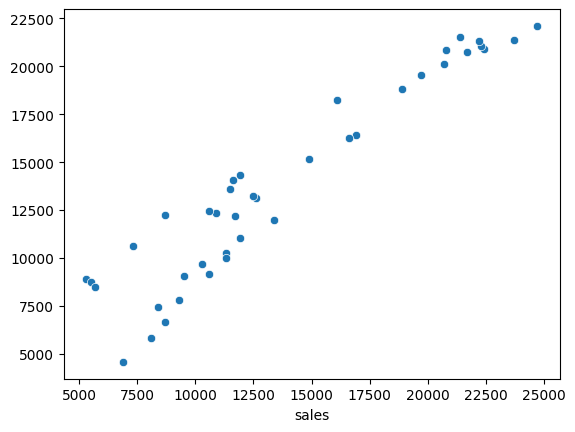

In [23]:
sns.scatterplot(x = y_test, y = predictions);

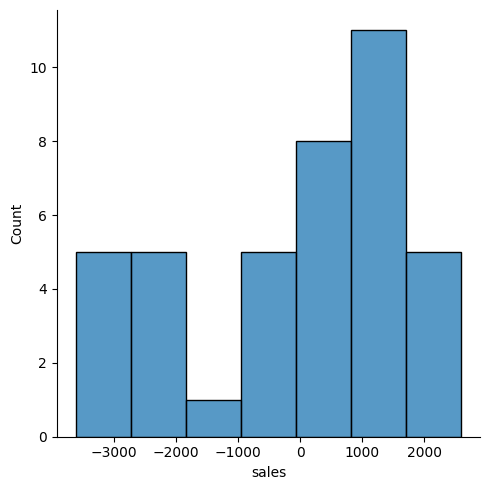

In [24]:
sns.displot((y_test - predictions));

In [25]:
from scipy import stats

res = stats.normaltest(y_test - predictions)
res

NormaltestResult(statistic=4.102154136183676, pvalue=0.12859632197515758)

In [26]:
from sklearn import metrics

y_pred = lr.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test  MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))


Train MSE: 2705129.423081415
Test  MSE: 3174097.353976107


In [27]:
lr.score(X_train, y_train)

0.8957008271017817

In [28]:
lr.score(X_test, y_test)

0.8994380241009119